## 7.1 선형판별분석법과 이차판별분석법

선형판별분석법(linear discriminant analysis, LDA)과 이차판별분석법(quadratic discriminant analysis, QDA)는 대표적인 확률론적 생성모형(generative model)이다. 가능도 즉, y의 클래스값에 따른 x의 분포에 대한 정보를 먼저 알아낸 후, 베이즈 정리를 사용하여 주어진 x에 대한 y의 확률분포를 찾아낸다.

### 생성모형

생성모형에서는 베이즈 정리를 사용하여 조건부확률 $p(y = k \mid x)$ 을 계산한다.

$$
P(y = k \mid x) = \dfrac{P(x \mid y = k)\; P(y = k)}{P(x)}
$$

분류문제를 풀기 위해서는 각 클래스 $k$에 대한 확률을 비교하여 가장 큰 값을 선택한다. 따라서 모든 클래스에 대해 값이 같은 분모 ${P(x)}$은 굳이 계산하지 않아도 괜찮다.

$$
P(y = k \mid x) \;\; \propto \;\; P(x \mid y = k) \; P(y = k)
$$


여기에서 사전확률 $P(y = k)$는 특별한 정보가 없는 경우, 다음처럼 계산한다.

$$
P(y = k) \approx \frac{\;\;\;\; y = k \text{인 데이터의 수 } \text{ }\;\;\;\;\;\; }{{\text{ }}\text{    모든 데이터의 수    }\;\;\;\;\;\;\;\;}
$$

만약 다른 지식이나 정보로 알고 있는 사전확률값이 있다면 그 값을 사용하면 된다.

$y$에 대한 $x$의 조건부확률인 가능도는 다음과 같이 계산한다.

1. $P(x \mid y = k)$ 가 특정한 확률분포 모형을 따른다고 가정한다. 즉, 확률밀도함수의 형태를 가정한다.
2. $k$번째 클래스에 속하는 학습 데이터 $\{x_1, \cdots, x_N\}$을 사용하여 이 모형의 모수값을 구한다.
3. 모수값을 알고 있으므로 $P(x \mid y = k)$의 확률 밀도 함수를 구한 것이다. 즉, 새로운 독립변수 값 $x$이 어떤 값이 되더라도 $P(x \mid y = k)$의 값을 계산할 수 있다.

### 이차판별분석법

이차판별분석법에서는 독립변수 $x$가 실수이고 확률분포가 다변수 정규분포라고 가정한다. 단 $x$ 분포의 위치와 형태는 클래스에 따라 달라질 수 있다.

$$
p(x \mid y = k) = \dfrac{1}{(2\pi)^{D/2} |\Sigma_k|^{1/2}} \exp \left( -\dfrac{1}{2} (x-\mu_k)^T \Sigma_k^{-1} (x-\mu_k) \right)
$$

이 분포들을 알고 있으면 독립변수 $x$에 대한 $y$ 클래스의 조건부확률분포는 다음과 같이 베이즈 정리와 전체 확률의 법칙으로 구할 수 있다.

$$
P(y=k \mid x) = \dfrac{p(x \mid y = k)P(y=k)}{p(x)} = \dfrac{p(x \mid y = k)P(y=k)}{\sum_l p(x \mid y = l)P(y=l) }
$$

예를 들어 $y$가  1, 2, 3 이라는 3개의 클래스를 가지고 각 클래스에서의 $x$의 확률분포가 다음과 같은 기대값 및 공분산 행렬을 가진다고 가정하자.

$$
\mu_1 = \begin{bmatrix}  0 \\ 0 \end{bmatrix}, \;\;
\mu_2 = \begin{bmatrix}  1 \\ 1 \end{bmatrix}, \;\;
\mu_3 = \begin{bmatrix}-1  \\ 1 \end{bmatrix}
$$

$$
\Sigma_1 = \begin{bmatrix} 0.7 &   0 \\ 0   & 0.7 \end{bmatrix}, \;\;
\Sigma_2 = \begin{bmatrix} 0.8 & 0.2 \\ 0.2 & 0.8 \end{bmatrix}, \;\;
\Sigma_3 = \begin{bmatrix} 0.8 & 0.2 \\ 0.2 & 0.8 \end{bmatrix}
$$

$y$의 사전 확률은 다음과 같이 동일하다

$$
P(Y=1) = P(Y=2) = P(Y=3) = \dfrac{1}{3}
$$

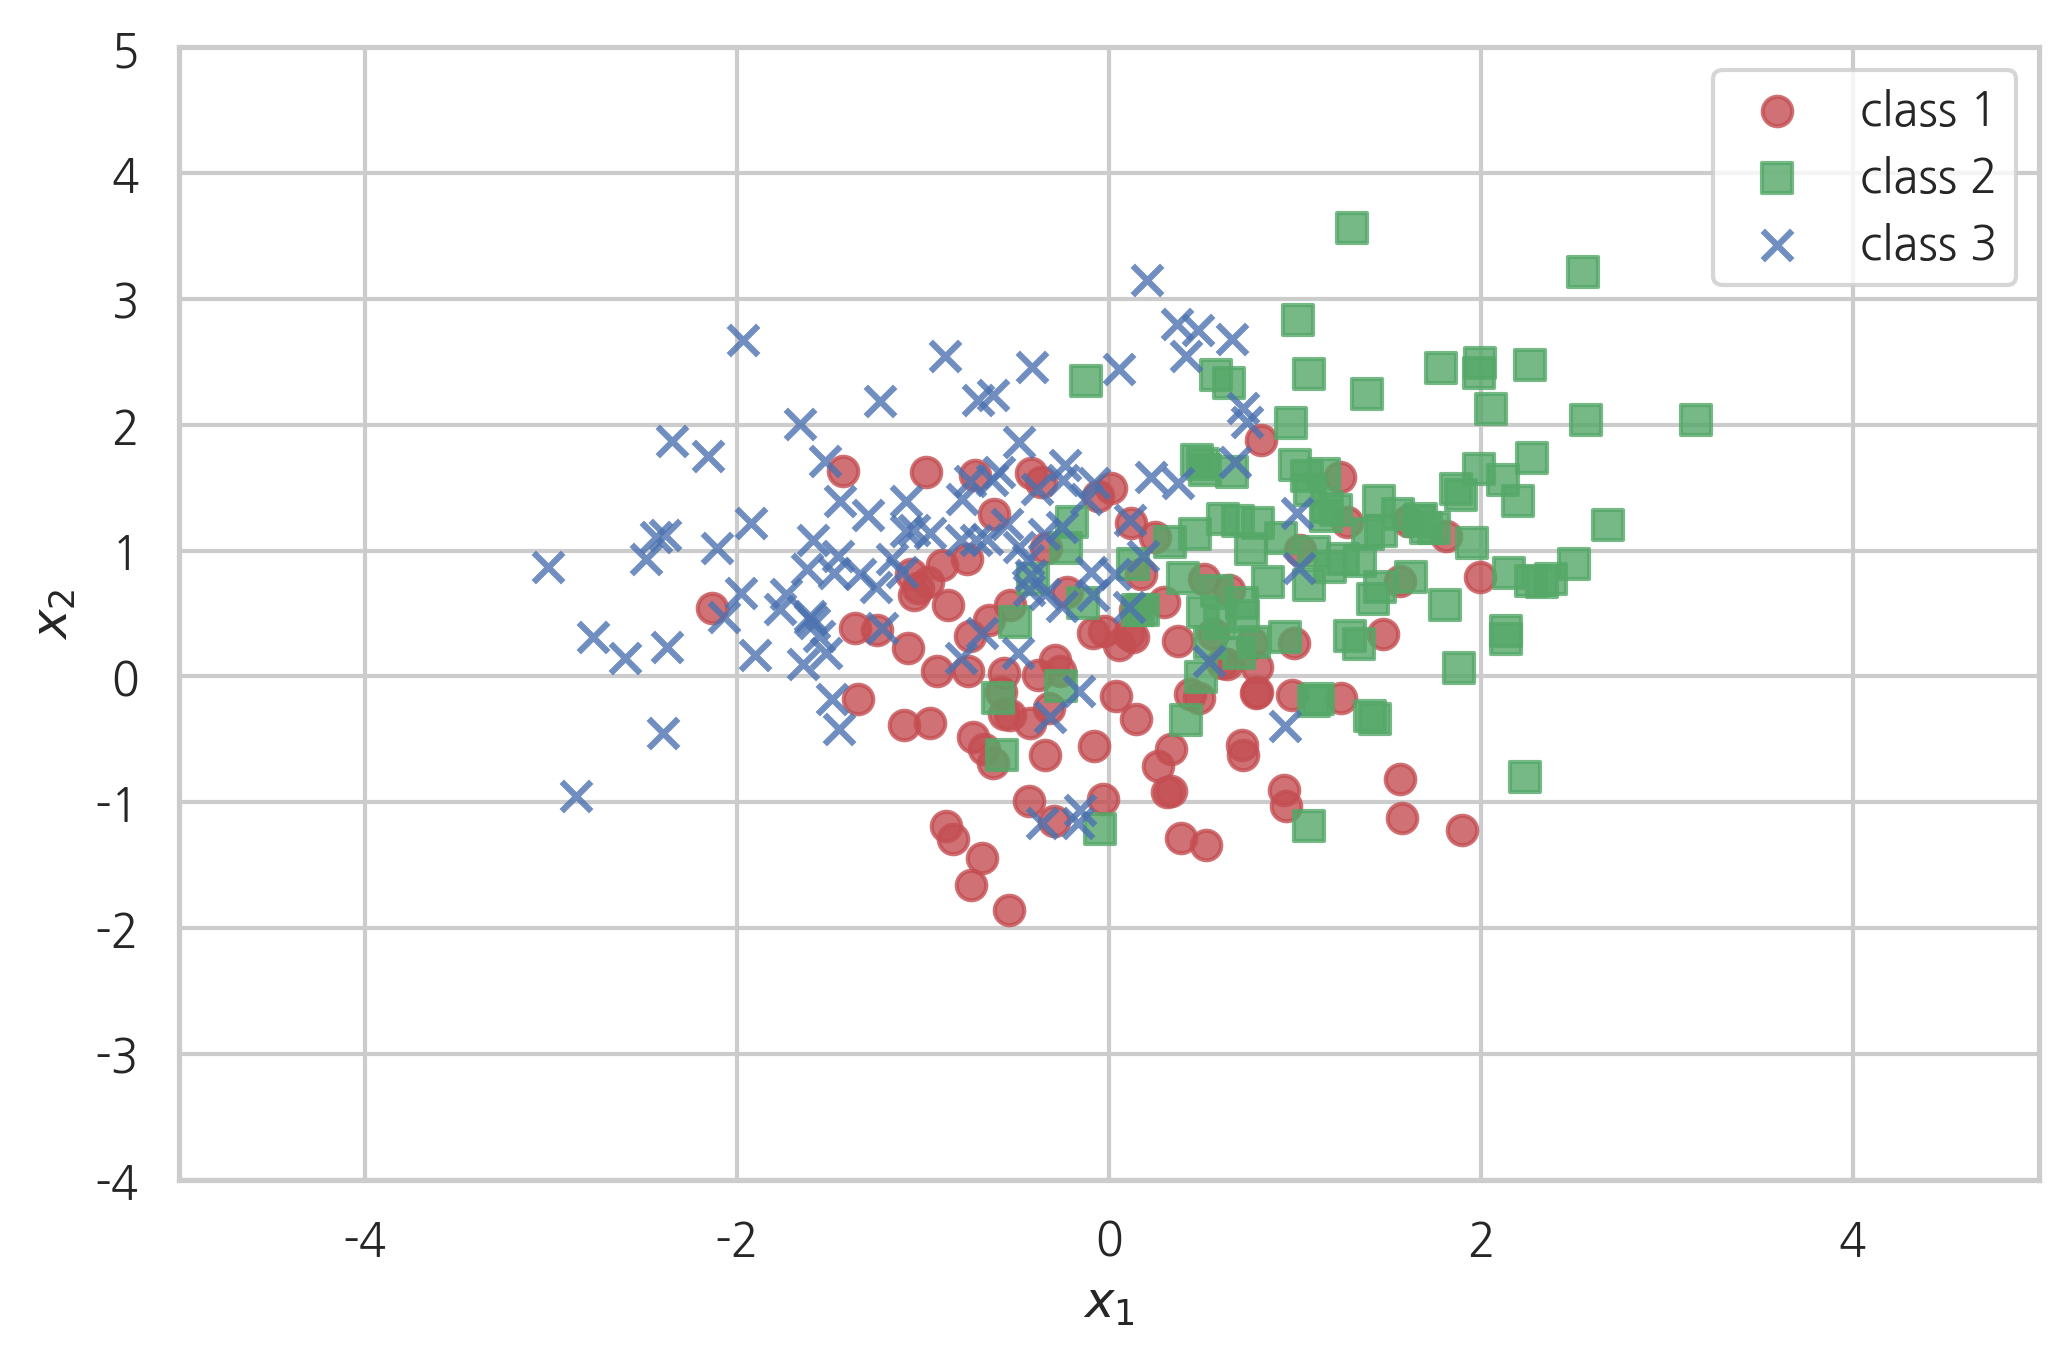

In [1]:
N = 100
rv1 = sp.stats.multivariate_normal([ 0, 0], [[0.7, 0.0], [0.0, 0.7]])
rv2 = sp.stats.multivariate_normal([ 1, 1], [[0.8, 0.2], [0.2, 0.8]])
rv3 = sp.stats.multivariate_normal([-1, 1], [[0.8, 0.2], [0.2, 0.8]])
np.random.seed(0)
X1 = rv1.rvs(N)
X2 = rv2.rvs(N)
X3 = rv3.rvs(N)
y1 = np.zeros(N)
y2 = np.ones(N)
y3 = 2 * np.ones(N)
X = np.vstack([X1, X2, X3])
y = np.hstack([y1, y2, y3])

plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="class 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="class 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="class 3")
plt.xlim(-5, 5)
plt.ylim(-4, 5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()

Scikit-Learn은 이차판별분석법을 위한 `QuadraticDiscriminantAnalysis` 클래스를 제공한다. 

In [2]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y)

학습용 데이터에서 가능도를 추정한 후에는 다음과 같은 속성을 가지게 된다.

* `priors_`: 각 클래스 $k$의 사전확률.
* `means_`: 각 클래스 $k$에서 $x$의 기댓값 벡터 $\mu_k$의 추정치 벡터.
* `covariance_`: 각 클래스 $k$에서 $x$의 공분산 행렬 $\Sigma_k$의 추정치 행렬. (생성자 인수 `store_covariance` 값이 True인 경우에만 제공)

In [3]:
qda.priors_

array([0.33333333, 0.33333333, 0.33333333])

In [4]:
qda.means_

array([[-8.01254084e-04,  1.19457204e-01],
       [ 1.16303727e+00,  1.03930605e+00],
       [-8.64060404e-01,  1.02295794e+00]])

In [5]:
qda.covariance_[0]

array([[ 0.73846319, -0.01762041],
       [-0.01762041,  0.72961278]])

In [6]:
qda.covariance_[1]

array([[0.66534246, 0.21132313],
       [0.21132313, 0.78806006]])

In [7]:
qda.covariance_[2]

array([[0.9351386 , 0.22880955],
       [0.22880955, 0.79142383]])

이 확률분포를 사용하여 분류를 한 결과는 다음과 같다.

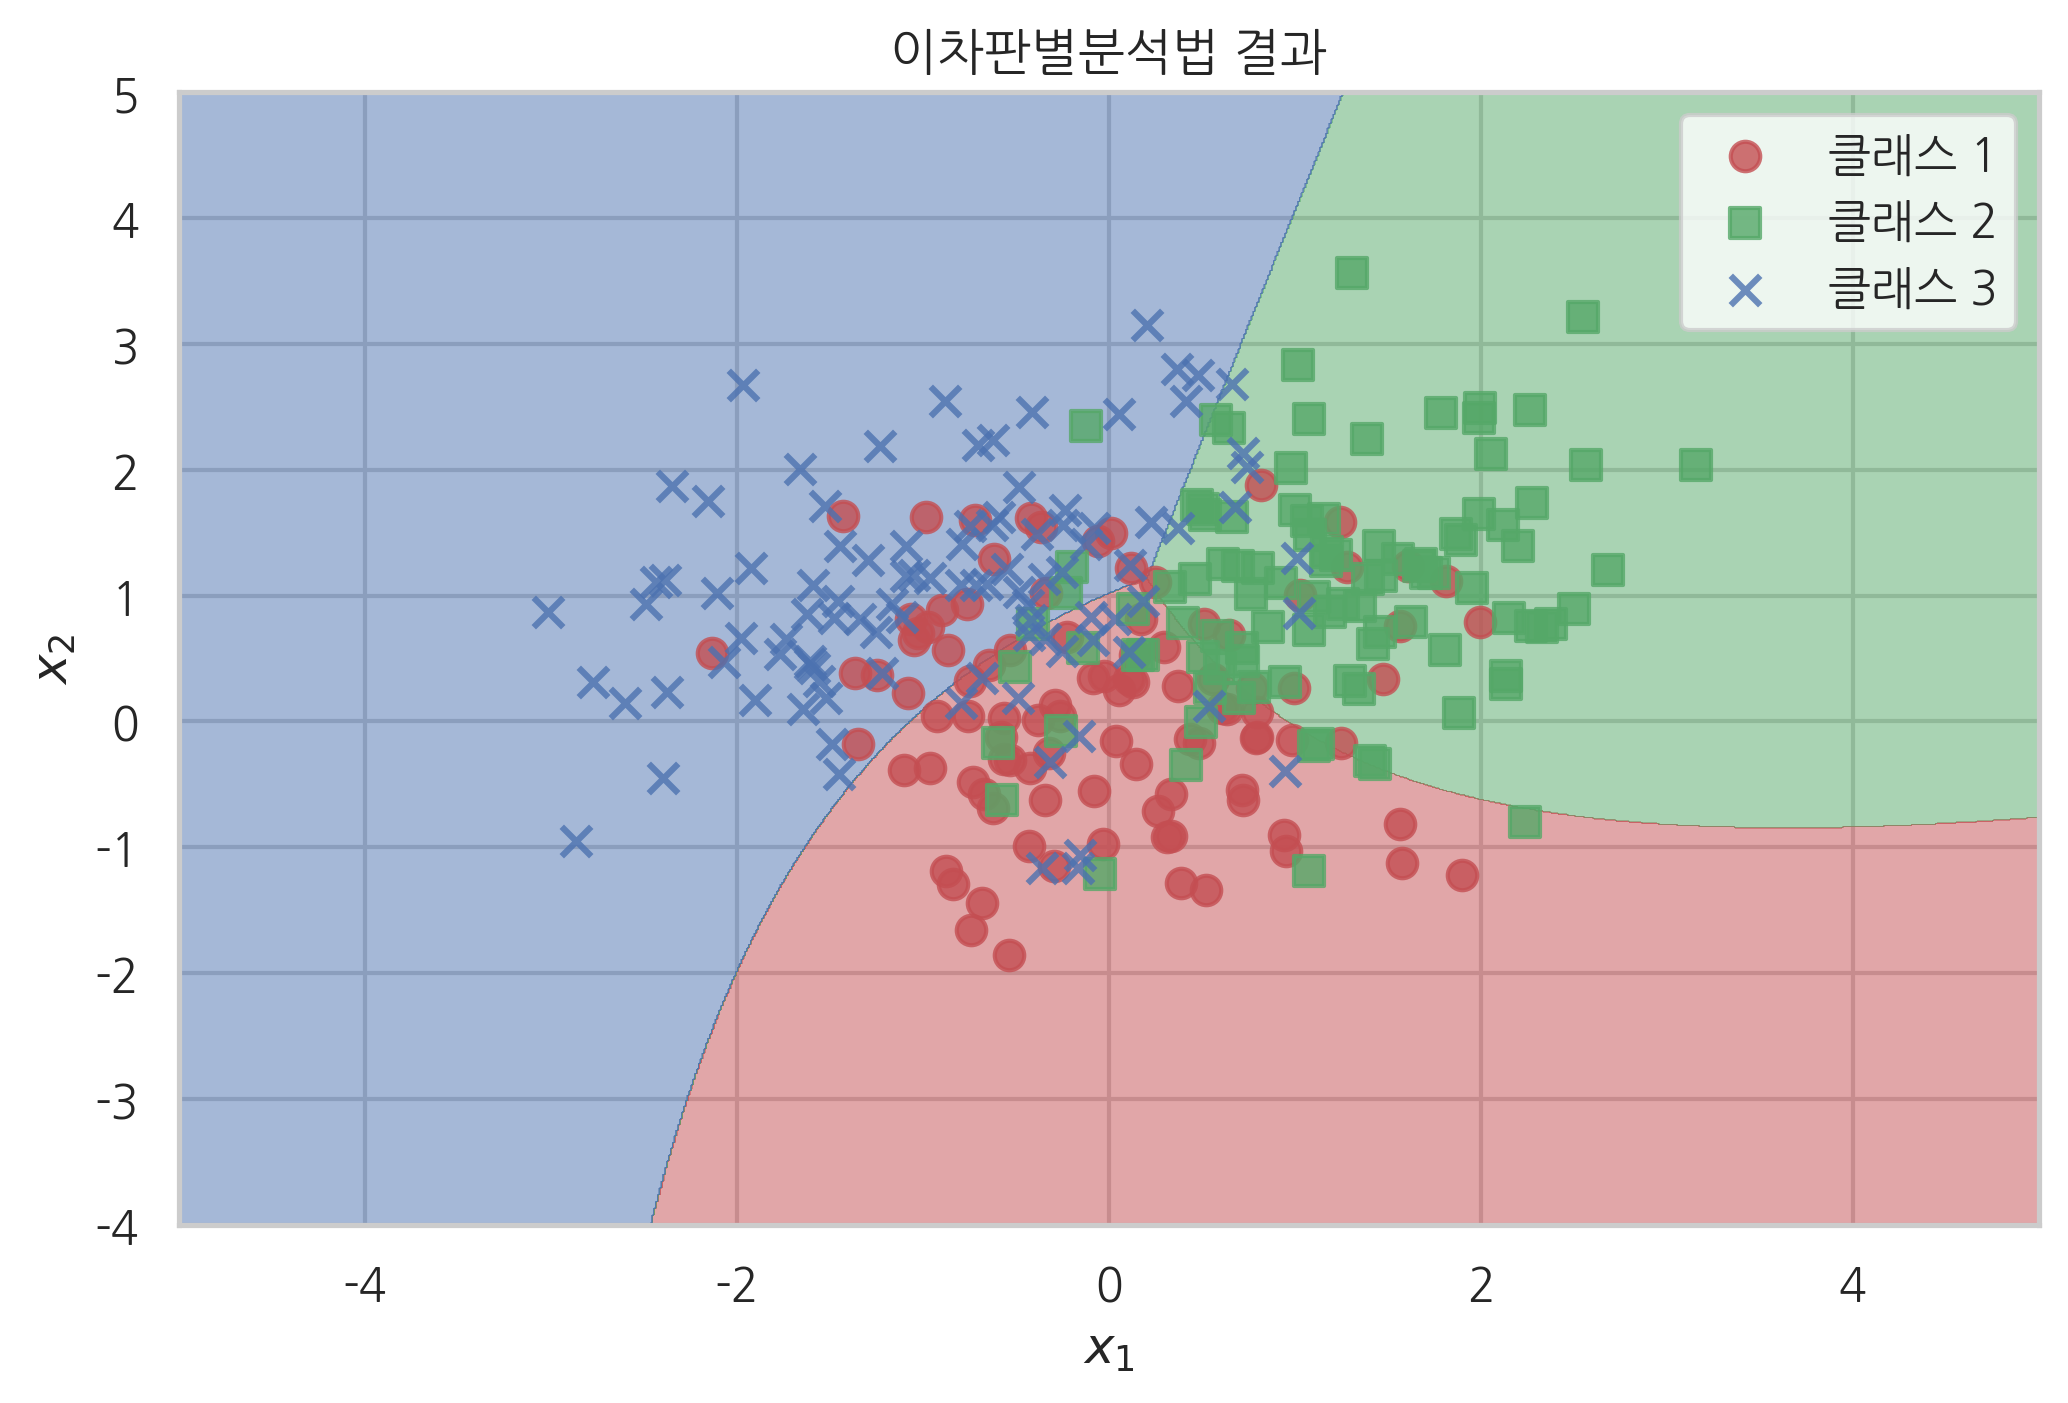

In [8]:
x1min, x1max = -5, 5
x2min, x2max = -4, 5
XX1, XX2 = np.meshgrid(np.arange(x1min, x1max, (x1max-x1min)/1000),
                       np.arange(x2min, x2max, (x2max-x2min)/1000))
YY = np.reshape(qda.predict(np.array([XX1.ravel(), XX2.ravel()]).T), XX1.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(["r", "g", "b"]).as_hex())
plt.contourf(XX1, XX2, YY, cmap=cmap, alpha=0.5)
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="클래스 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="클래스 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="클래스 3")
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("이차판별분석법 결과")
plt.legend()
plt.show()

#### 연습 문제 1

이차판별분석법을 사용하여 붓꽃 분류문제를 풀고 성능을 분류결과표와 분류보고서를 출력하라. 그리고 각 클래스에 대한 ROC 커브를 그려라.

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
X1 = iris.data
y1 = iris.target

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model = QuadraticDiscriminantAnalysis().fit(X1, y1)
y1_pred = model.predict(X1)

from sklearn.metrics import confusion_matrix

confusion_matrix(y1, y1_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]])

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y1, y1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



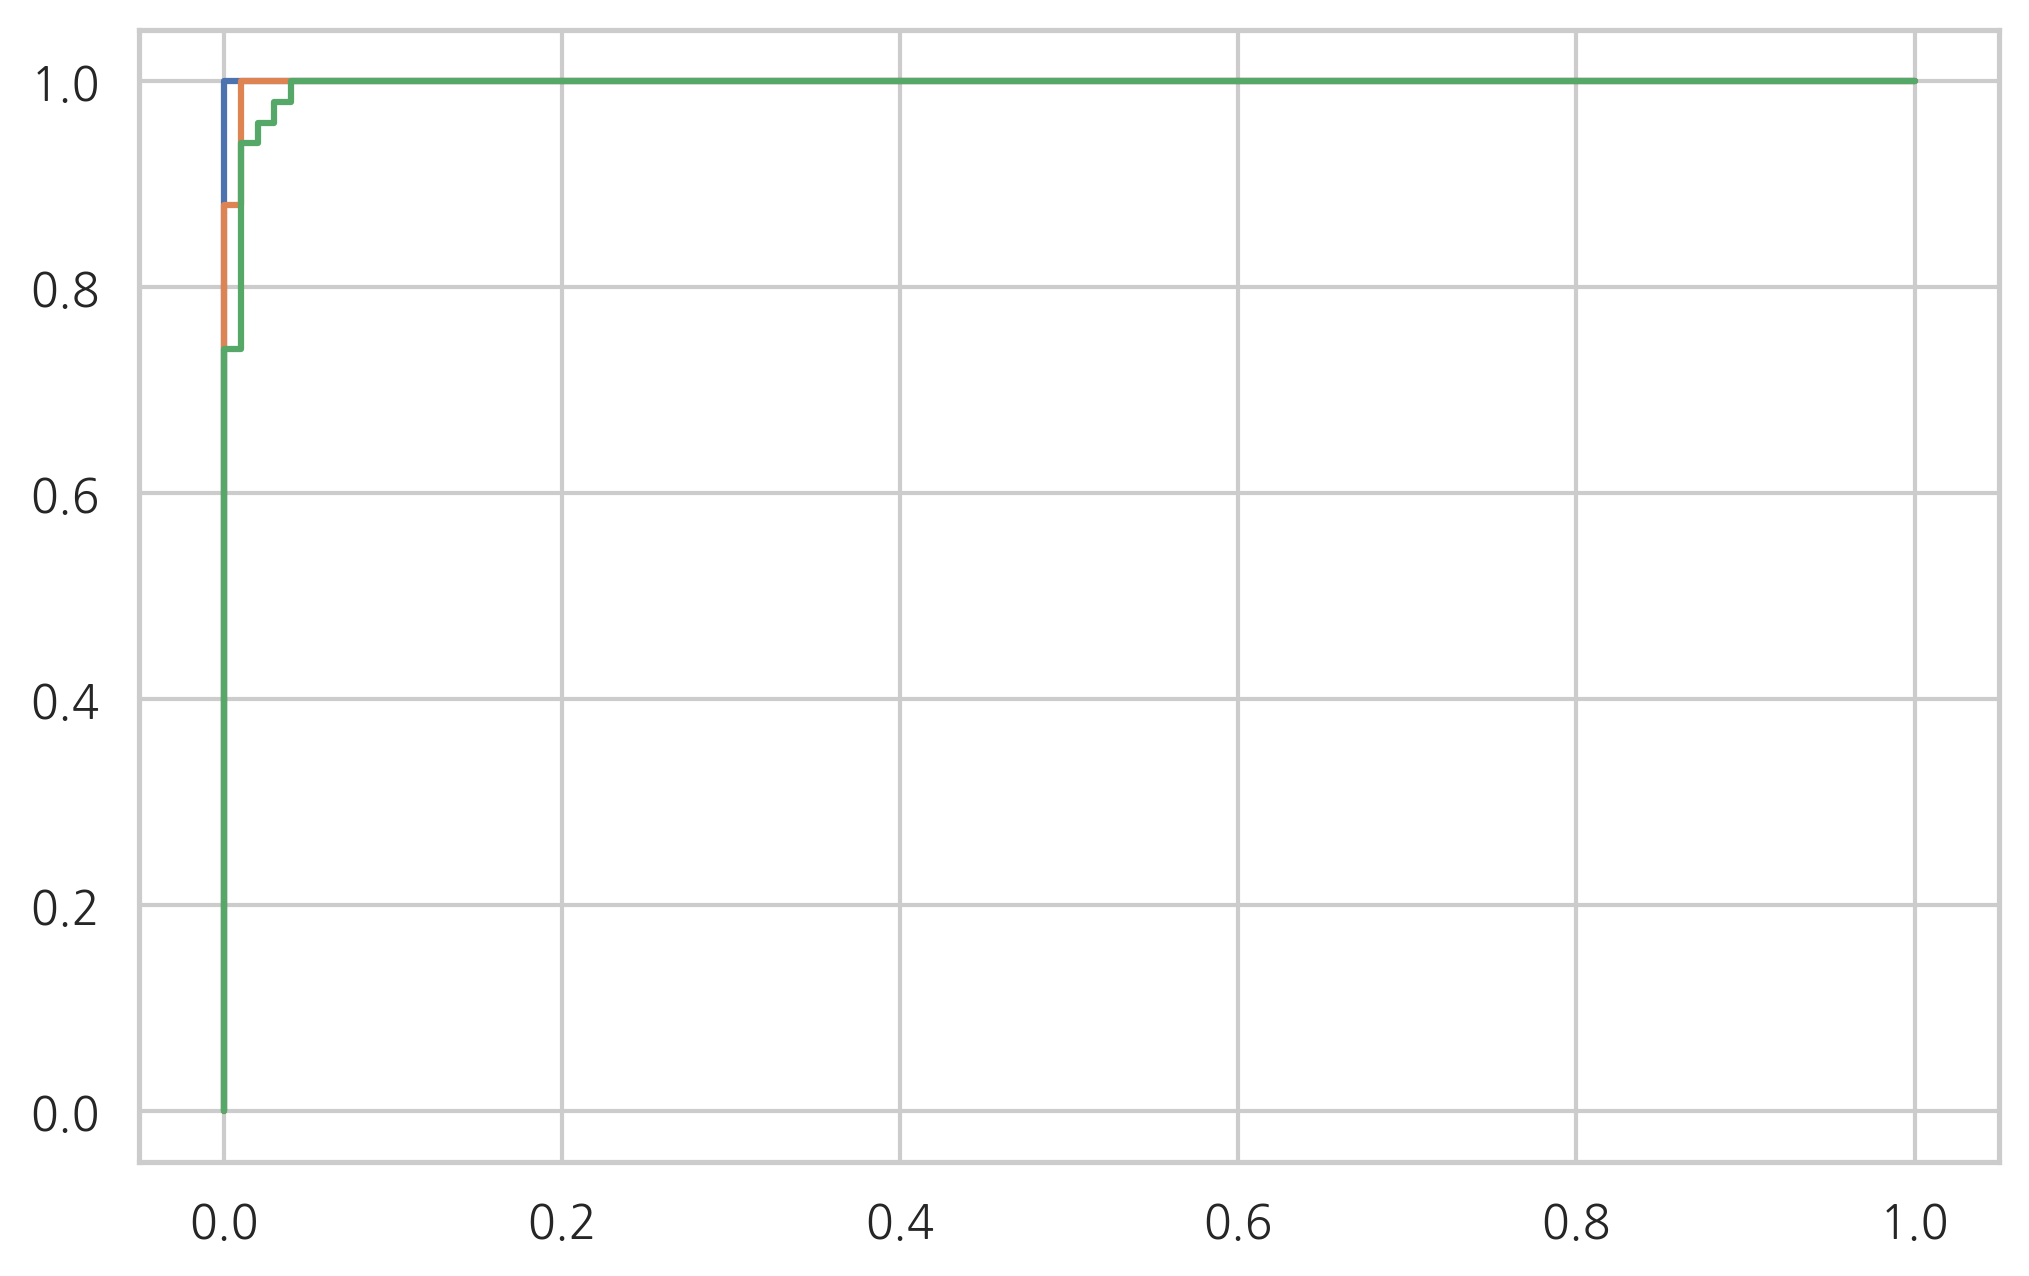

In [11]:
from sklearn.preprocessing import label_binarize

y1_vec = label_binarize(y1, [0, 1, 2])

from sklearn.metrics import roc_curve

for i in range(3):
    model = QuadraticDiscriminantAnalysis().fit(X1, y1_vec[:, i])
    fpr, tpr, thr = roc_curve(y1_vec[:, i], model.predict_proba(X1)[:, 1])
    plt.plot(fpr, tpr)

plt.show()

### 선형판별분석법

선형판별분석법에서는 각 Y 클래스에 대한 독립변수 X의 조건부확률분포가 **공통된 공분산 행렬을 가지는** 다변수 정규분포(multivariate Gaussian normal distribution)이라고 가정한다. 즉

$$ \Sigma_k = \Sigma \;\;\; \text{ for all } k $$

이다.

이 때는 조건부확률분포를 다음과 같이 정리할 수 있다.

$$
\begin{eqnarray}
\log p(x \mid y = k) 
&=& \log \dfrac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} -  \dfrac{1}{2} (x-\mu_k)^T \Sigma^{-1} (x-\mu_k) \\
&=& C_0 - \dfrac{1}{2} (x-\mu_k)^T \Sigma^{-1} (x-\mu_k) \\
&=& C_0 - \dfrac{1}{2} \left( x^T\Sigma^{-1}x - 2\mu_k^T \Sigma^{-1}x + \mu_k^T \Sigma^{-1}\mu_k \right) \\
&=& C(x)  + \mu_k^T \Sigma^{-1}x - \dfrac{1}{2} \mu_k^T \Sigma^{-1}\mu_k \\
\end{eqnarray}
$$


$$
\begin{eqnarray}
p(x \mid y = k) 
&=& C'(x)\exp(w_k^Tx + w_{k0}) \\
\end{eqnarray}
$$

이 식에서 $C'(x) = \exp C(x) $이다.

$$
\begin{eqnarray}
P(y=k \mid x) 
&=& \dfrac{p(x \mid y = k)P(y=k)}{\sum_l p(x \mid y = l)P(y=l) } \\
&=& \dfrac{C'(x)\exp(w_k^Tx + w_{k0}) P(y=k)}{\sum_l C'(x)\exp(w_l^Tx + w_{l0})P(y=l) } \\
&=& \dfrac{C'(x)\exp(w_k^Tx + w_{k0}) P(y=k)}{C'(x)\sum_l \exp(w_l^Tx + w_{l0})P(y=l) } \\
&=& \dfrac{P(y=k) \exp(w_k^Tx + w_{k0}) }{\sum_l P(y=l) \exp(w_l^Tx + w_{k0})} \\
&=& \dfrac{P(y=k) \exp(w_k^Tx + w_{k0}) }{P(x)} \\
\end{eqnarray}
$$

이 식에서 $P(x)$는 $y$ 클래스값에 영향을 받지 않는다.

따라서

$$
\log P(y=k \mid x) = \log P(y=k) + w_k^Tx + w_{k0} - \log{P(x)} = w_k^Tx + C''_k
$$

모든 클래스 $k$에 대해 위와 같은 식이 성립하므로 클래스 $k_1$과 클래스 $k_2$의 경계선, 즉 두 클래스에 대한 확률값이 같아지는 $x$ 위치를 찾으면 다음과 같다.

$$  w_{k_1}^Tx + C''_{k_1} = w_{k_2}^Tx + C''_{k_2} $$

$$  (w_{k_1} - w_{k_2})^Tx + (C''_{k_1} - C''_{k_2}) = 0 $$

$$  w^Tx + C = 0 $$


즉, 판별함수가 x에 대한 선형방정식이 되고 경계선의 모양이 직선이 된다.

Scikit-Learn은 선형판별분석법을 위한 `LinearDiscriminantAnalysis` 클래스를 제공한다. 

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=3, solver="svd", store_covariance=True).fit(X, y)

선형판별분석법에서는 기댓값 벡터만 클래스에 따라 달라지고 공분산 행렬은 공통으로 추정한다.

In [13]:
lda.means_

array([[-8.01254084e-04,  1.19457204e-01],
       [ 1.16303727e+00,  1.03930605e+00],
       [-8.64060404e-01,  1.02295794e+00]])

In [14]:
lda.covariance_

array([[0.7718516 , 0.13942905],
       [0.13942905, 0.7620019 ]])

결과는 다음처럼 직선인 경계선을 가진다.

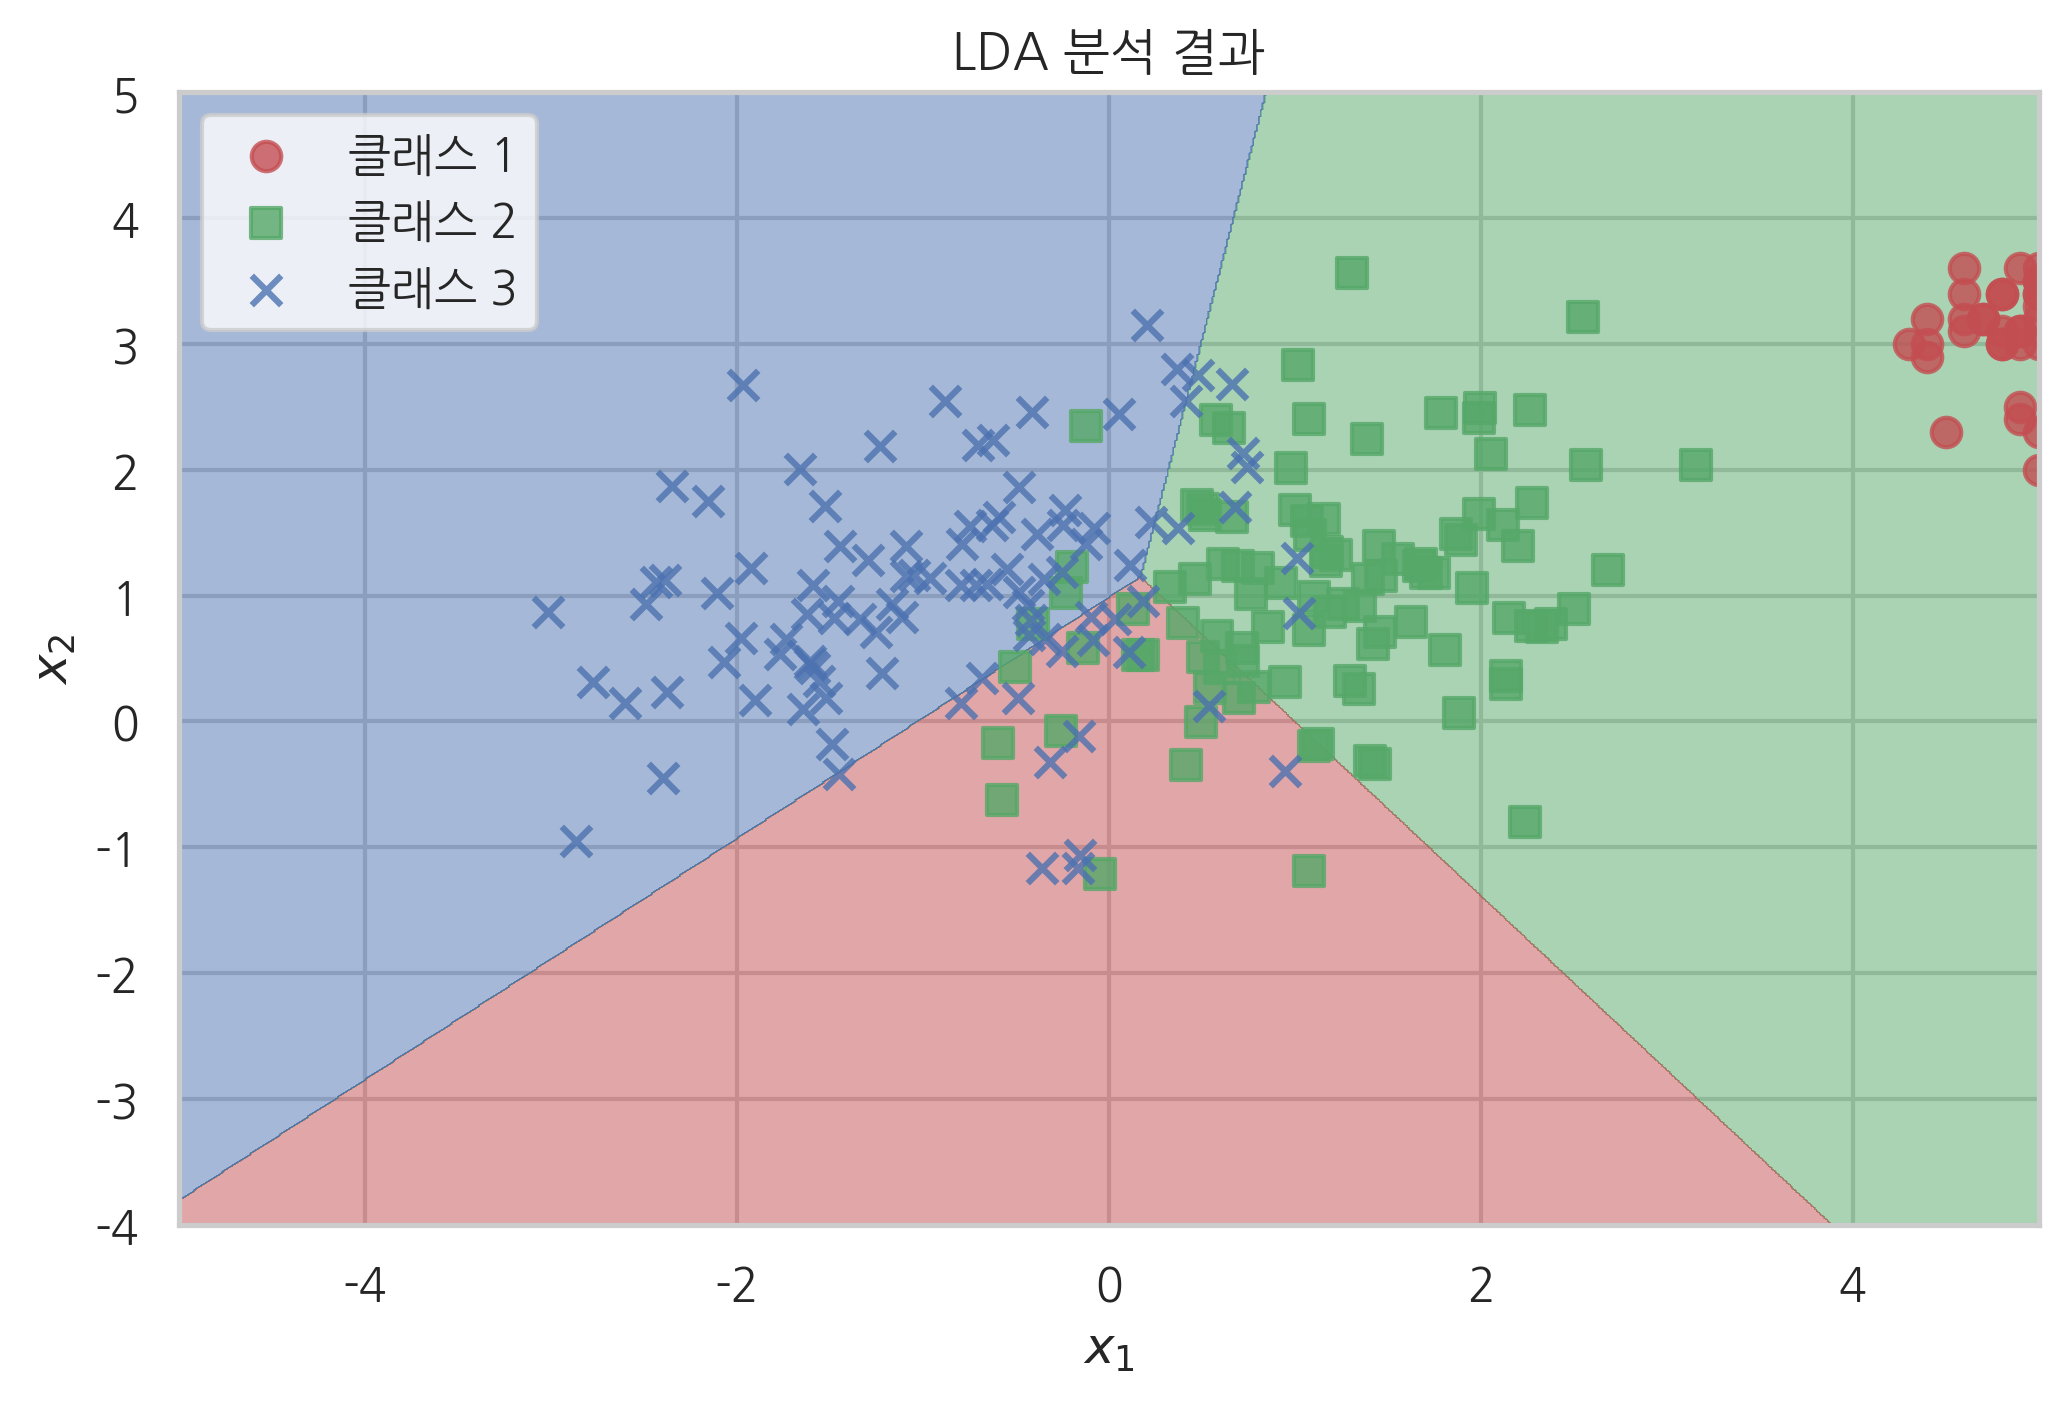

In [15]:
x1min, x1max = -5, 5
x2min, x2max = -4, 5
XX1, XX2 = np.meshgrid(np.arange(x1min, x1max, (x1max-x1min)/1000),
                       np.arange(x2min, x2max, (x2max-x2min)/1000))
YY = np.reshape(lda.predict(np.array([XX1.ravel(), XX2.ravel()]).T), XX1.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(["r", "g", "b"]).as_hex())
plt.contourf(XX1, XX2, YY, cmap=cmap, alpha=0.5)
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="클래스 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="클래스 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="클래스 3")
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.title("LDA 분석 결과")
plt.show()

#### 연습 문제 2

선형판별분석법을 사용하여 붓꽃 분류문제를 풀고 성능을 분류결과표와 분류보고서를 출력하라. 그리고 각 클래스에 대한 ROC 커브를 그려라.

In [16]:
from sklearn.datasets import load_iris
iris = load_iris()
X2 = iris.data
y2 = iris.target

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis().fit(X2, y2)
y2_pred = model.predict(X2)

from sklearn.metrics import confusion_matrix

confusion_matrix(y2, y2_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]])

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y2, y2_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



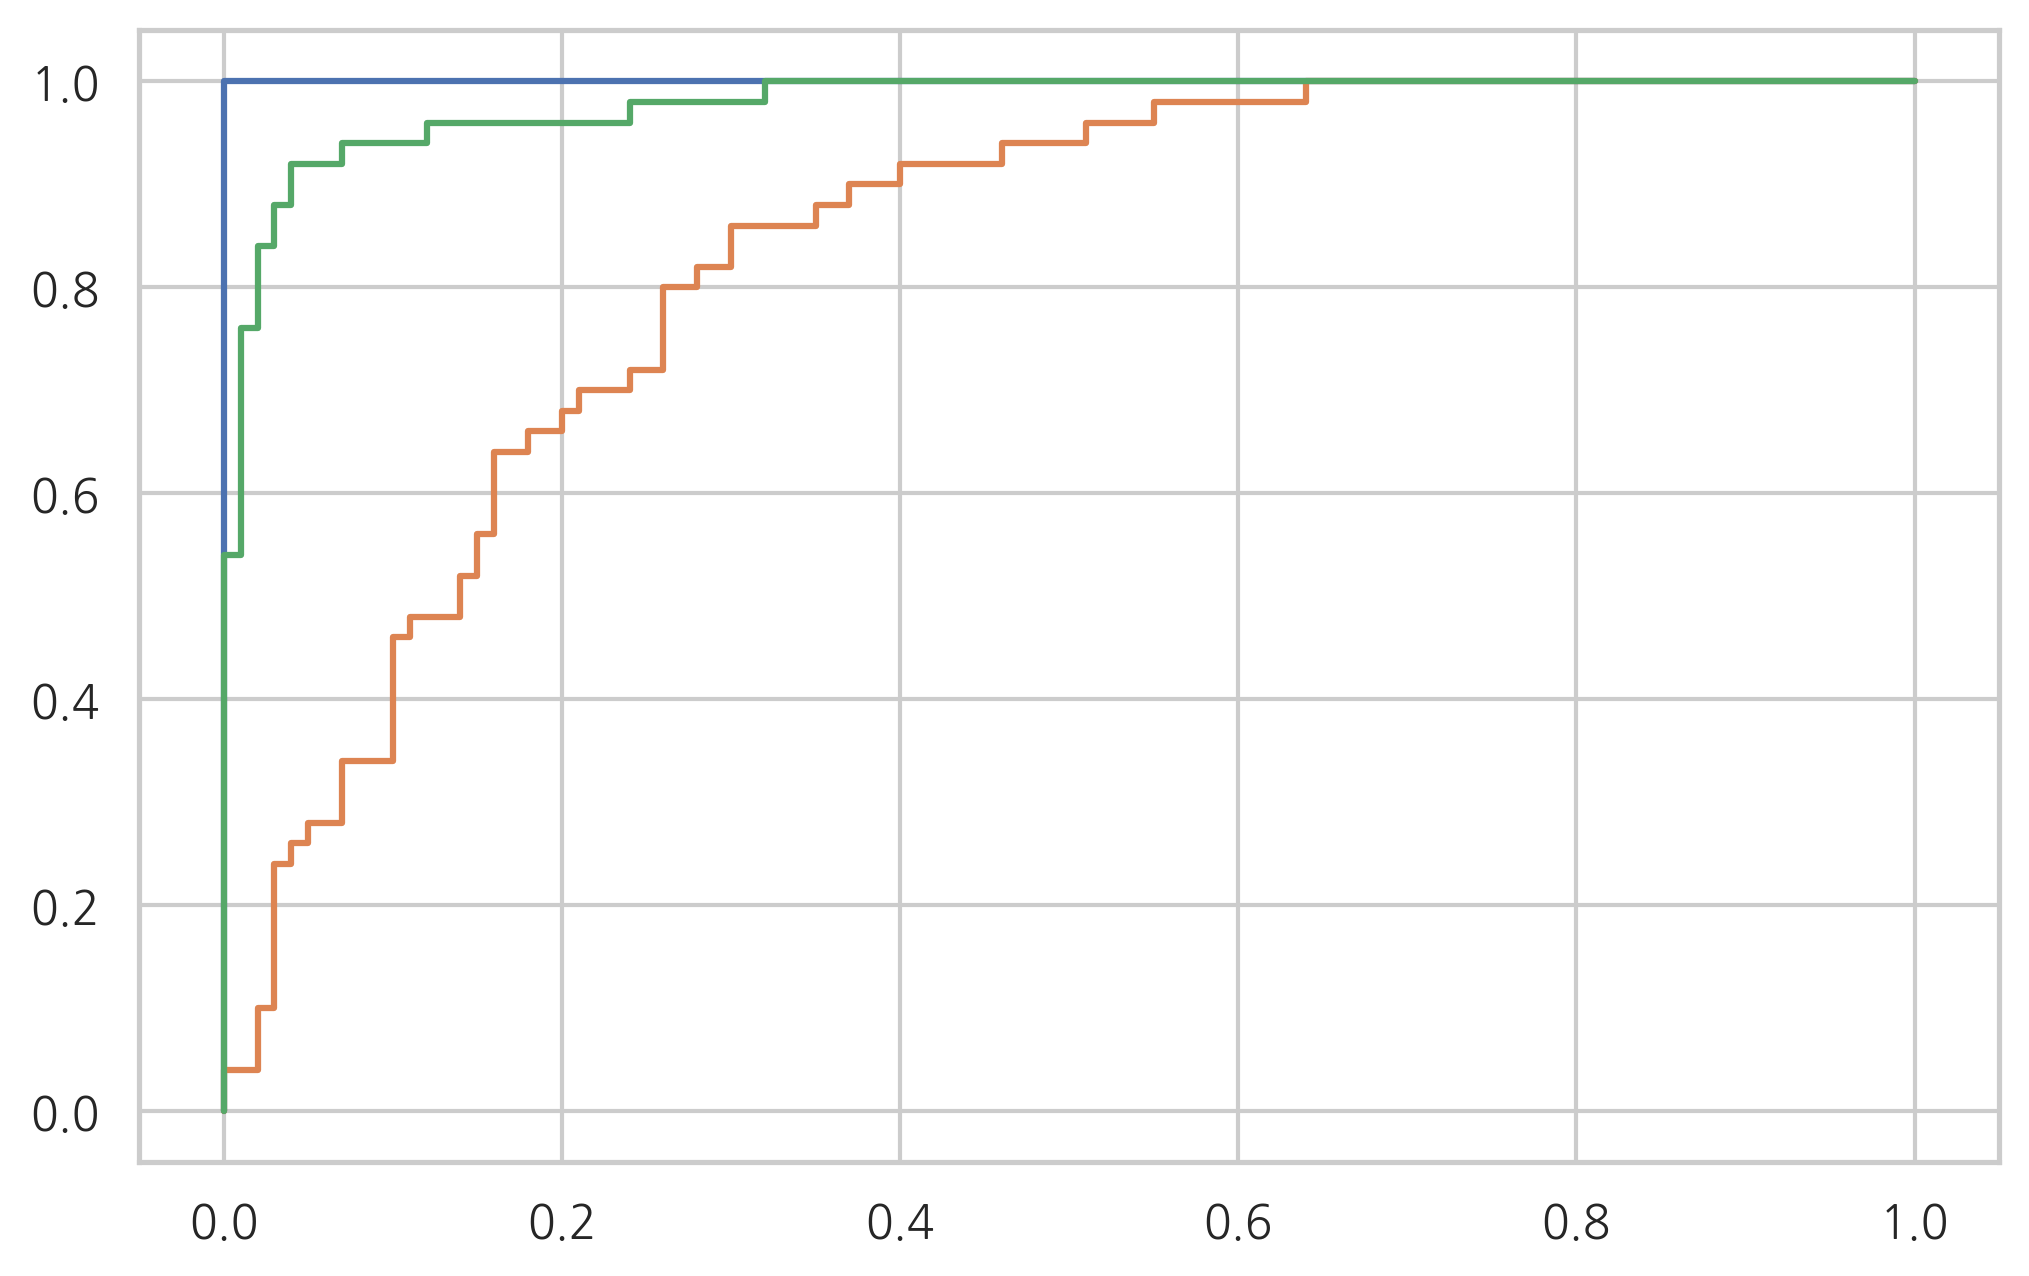

In [18]:
from sklearn.preprocessing import label_binarize

y2_vec = label_binarize(y2, [0, 1, 2])

from sklearn.metrics import roc_curve

for i in range(3):
    model = LinearDiscriminantAnalysis().fit(X2, y2_vec[:, i])
    fpr, tpr, thr = roc_curve(y2_vec[:, i], model.predict_proba(X2)[:, 1])
    plt.plot(fpr, tpr)

plt.show()